In [79]:
import pandas as pd


import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
path = '/home/bhatti/dataset/VCHAMPS/inpatient_admissions_train.csv'
inpatient_admissions_train = pd.read_csv(path).iloc[:,1:]
inpatient_admissions_train.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,No,No,NaN,Yes,Utah
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,No,Yes,No,No,North Carolina
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,No,No,NaN,No,North Carolina
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,No,Yes,NaN,Yes,Florida
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,No,No,NaN,NaN,Idaho


In [13]:
path2 = '/home/bhatti/dataset/VCHAMPS/demographics_static_train.csv'
demographics_static_train = pd.read_csv(path2).iloc[:,1:]
demographics_static_train.head()

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag
0,168674,Hispanic or Latino,Male,White,Yes
1,168681,Not Hispanic or Latino,Male,White,Yes
2,168696,Not Hispanic or Latino,Female,Not specified (no value),Yes
3,168711,Not Hispanic or Latino,Male,Other,Yes
4,168720,Not Hispanic or Latino,Male,White,Yes


In [109]:
inpatient_enth = inpatient_admissions_train.merge(demographics_static_train, how = 'left', on = 'Internalpatientid')
inpatient_enth.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Ethnicity,Gender,Races,Veteran flag
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,No,No,NaN,Yes,Utah,Not Hispanic or Latino,Male,White,Yes
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,No,Yes,No,No,North Carolina,Not Hispanic or Latino,Male,White,Yes
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,No,No,NaN,No,North Carolina,Not Hispanic or Latino,Male,White,Yes
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,No,Yes,NaN,Yes,Florida,Not Hispanic or Latino,Male,Black or African American,Yes
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,No,No,NaN,NaN,Idaho,Not specified,Male,Not specified (no value),Yes


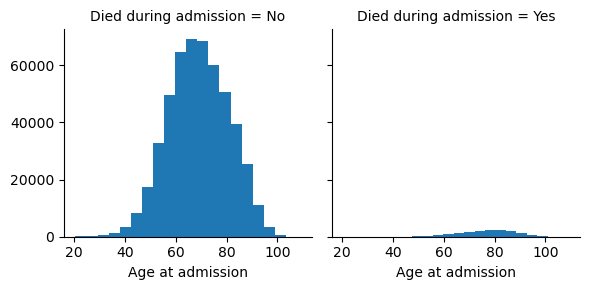

In [16]:
age_mortality = sns.FacetGrid(inpatient_enth, col='Died during admission')
age_mortality.map(plt.hist, 'Age at admission', bins=20)

In [59]:
inpatient_enth['Gender'].value_counts()

Male      506348
Female     16392
Name: Gender, dtype: int64

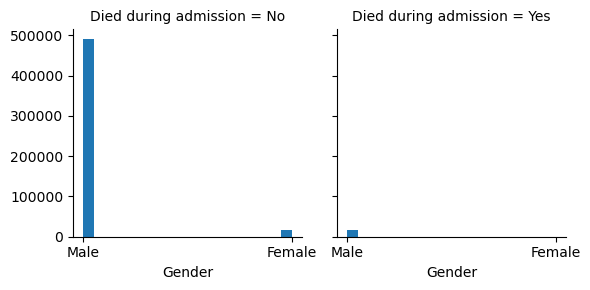

In [18]:
gender_mortality = sns.FacetGrid(inpatient_enth, col='Died during admission')
gender_mortality.map(plt.hist, 'Gender', bins=20)

In [36]:
inpatient_enth['Races'].unique()

array(['White', 'Black or African American', 'Not specified (no value)',
       'Other', 'Black or African American ; White', 'Asian',
       'White ; Other', 'Black or African American ; Other',
       'White ; Asian', 'Black or African American ; White ; Other',
       'Asian ; Other', '(Censored)', 'White ; Asian ; Other',
       'Black or African American ; Asian'], dtype=object)

#### Races need to combine

In [35]:
inpatient_enth['Races'].value_counts()

White                                        349337
Black or African American                    103364
Not specified (no value)                      31802
Other                                         26585
White ; Other                                  6587
Black or African American ; Other              1955
Black or African American ; White              1525
Asian                                          1344
Asian ; Other                                   104
White ; Asian                                    54
Black or African American ; White ; Other        49
White ; Asian ; Other                            16
Black or African American ; Asian                12
(Censored)                                        6
Name: Races, dtype: int64

In [52]:
def races_combine(data):
    for i in range(len(data['Races'])):
        if  data['Races'].loc[i] == 'White ; Other':
            data['Races'].loc[i] = 'White'
        elif data['Races'].loc[i] == 'Black or African American ; Other':
            data['Races'].loc[i] = 'Black or African American'
        elif data['Races'].loc[i] == 'Black or African American ; White':
            data['Races'].loc[i] = 'White'
        elif data['Races'].loc[i] == 'Asian ; Other':
            data['Races'].loc[i] = 'Asian'
        elif data['Races'].loc[i] == 'White ; Asian':
            data['Races'].loc[i] = 'White'
        elif data['Races'].loc[i] == 'Black or African American ; White ; Other':
            data['Races'].loc[i] = 'Other'
        elif data['Races'].loc[i] == 'White ; Asian ; Other':
            data['Races'].loc[i] = 'White'
        elif data['Races'].loc[i] == 'Black or African American ; Asian':
            data['Races'].loc[i] = 'Black or African American'
        elif data['Races'].loc[i] == '(Censored)':
            data['Races'].loc[i] = 'Not specified (no value)'
    return data

inpatient_enth = races_combine(inpatient_enth)

/tmp/ipykernel_12858/46100155.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Races'].loc[i] = 'White'
/tmp/ipykernel_12858/46100155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Races'].loc[i] = 'White'
/tmp/ipykernel_12858/46100155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Races'].loc[i] = 'Black or African American'
/tmp/ipykernel_12858/46100155.py:12: SettingWithCopyWarning: 
A value is trying 

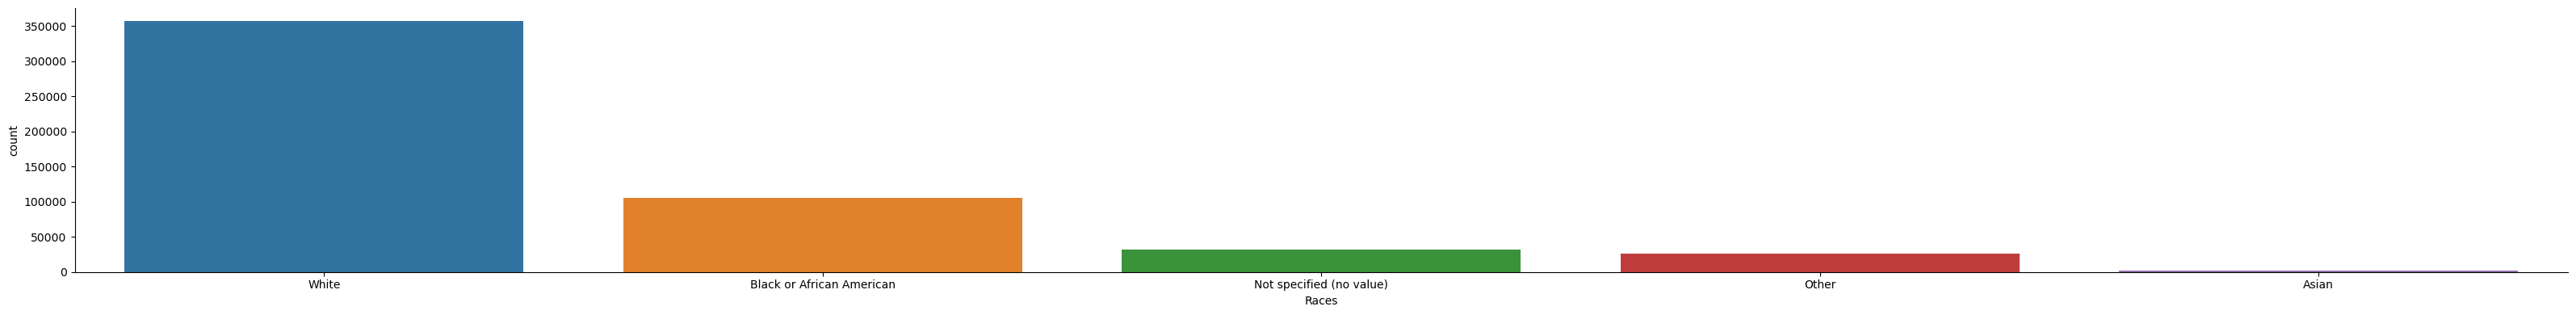

In [54]:
sns.catplot(data=inpatient_enth, x='Races', kind="count",height=4, aspect=8)

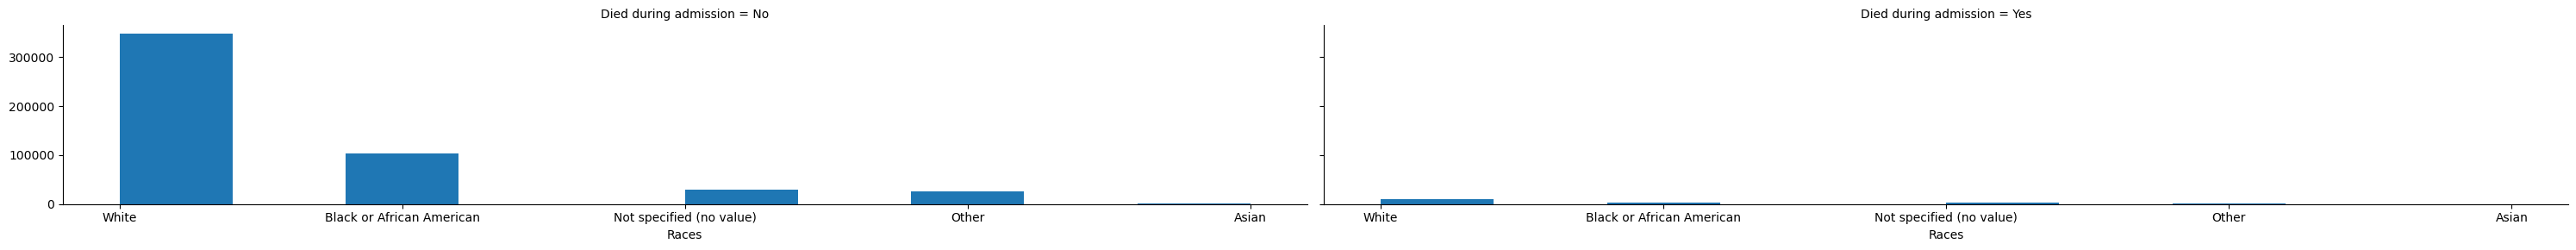

In [58]:
race_mortality = sns.FacetGrid(inpatient_enth, col='Died during admission',aspect=5)
race_mortality.map(plt.hist, 'Races', bins=10)

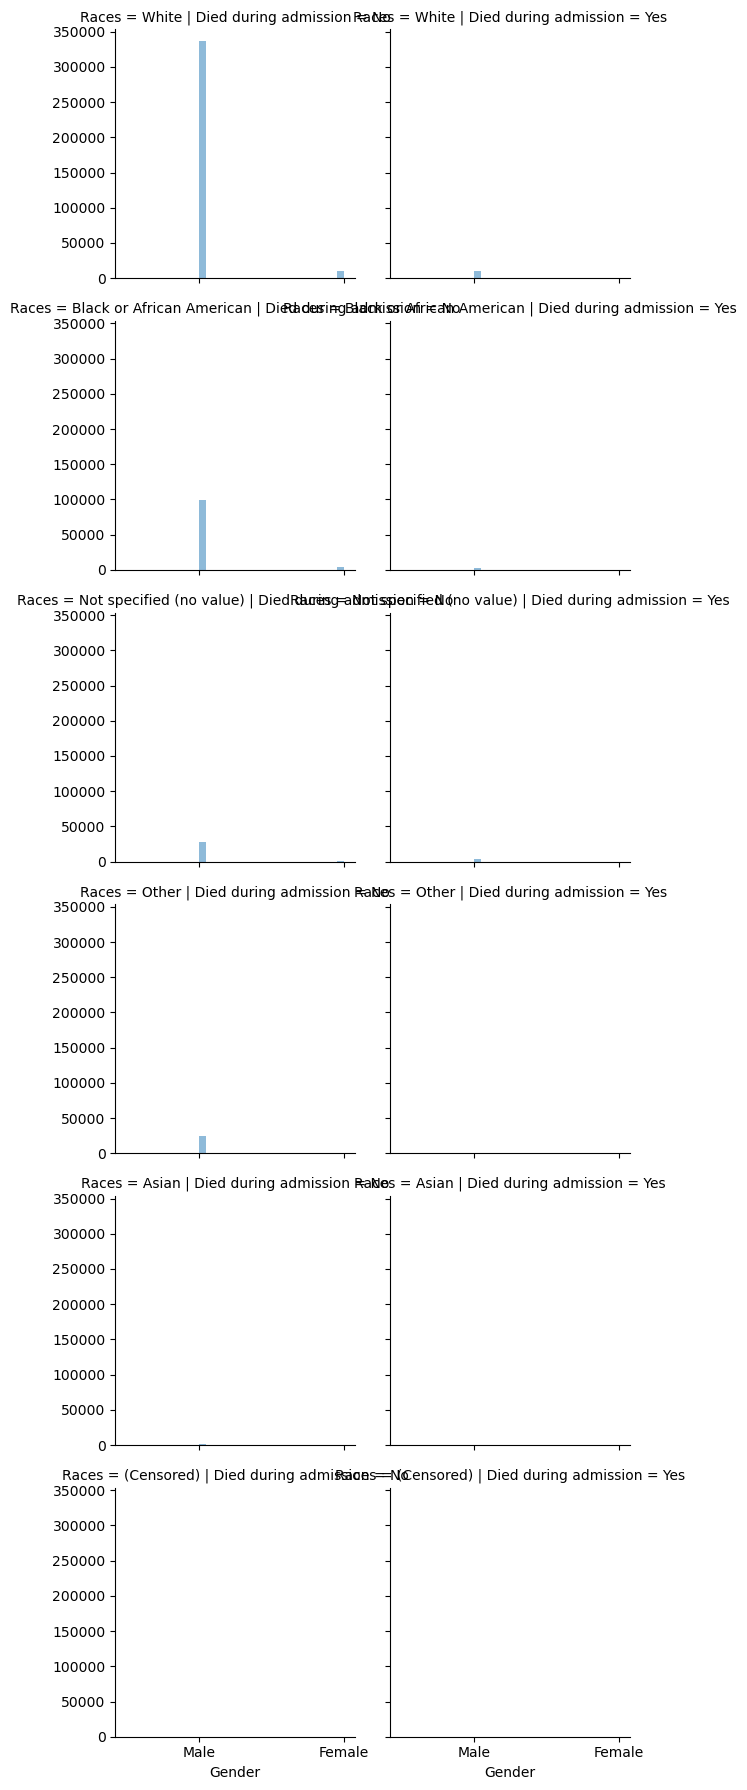

In [49]:
grid = sns.FacetGrid(inpatient_enth, col='Died during admission', row='Races')
grid.map(plt.hist, 'Gender', alpha=.5, bins=20)
grid.add_legend()

In [60]:
inpatient_enth['Veteran flag'].value_counts()

Yes    522370
No        370
Name: Veteran flag, dtype: int64

<Axes: xlabel='Veteran flag', ylabel='count'>

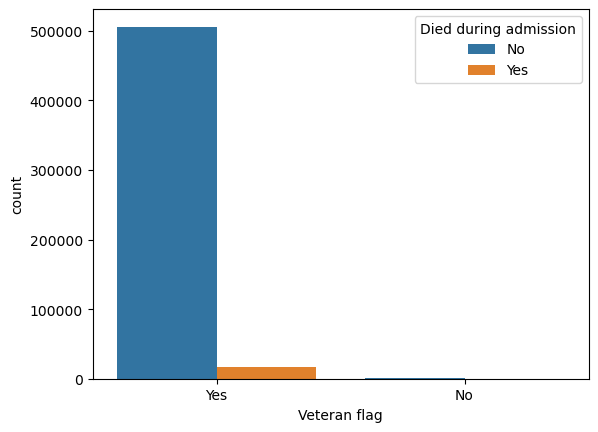

In [68]:
sns.countplot(data=inpatient_enth, x="Veteran flag", hue="Died during admission")

#### Undersampling

In [114]:
inpatient_enth2 = inpatient_enth.copy()
inpatient_enth2['Gender'].replace(['Female','Male'],[0,1],inplace=True)
inpatient_enth2['Veteran flag'].replace(['No','Yes'],[0,1],inplace=True)
inpatient_enth2['Died during admission'].replace(['No','Yes'],[0,1],inplace=True)

In [115]:
inpatient_enth2.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Ethnicity,Gender,Races,Veteran flag
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,0,No,NaN,Yes,Utah,Not Hispanic or Latino,1,White,1
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,0,Yes,No,No,North Carolina,Not Hispanic or Latino,1,White,1
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,0,No,NaN,No,North Carolina,Not Hispanic or Latino,1,White,1
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,0,Yes,NaN,Yes,Florida,Not Hispanic or Latino,1,Black or African American,1
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,0,No,NaN,NaN,Idaho,Not specified,1,Not specified (no value),1


<Axes: xlabel='Veteran flag', ylabel='count'>

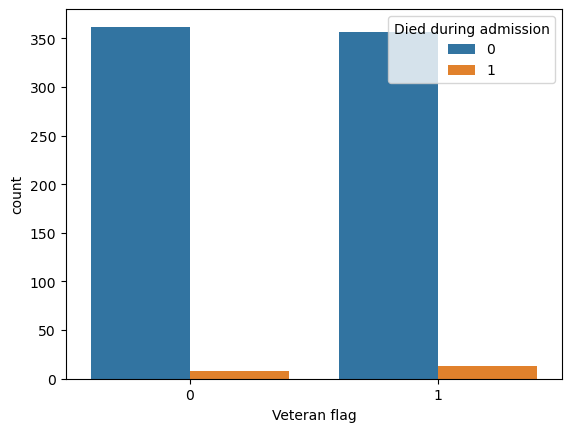

In [116]:
veteran_yes = inpatient_enth2[inpatient_enth2['Veteran flag'] == 1]
veteran_no = inpatient_enth2[inpatient_enth2['Veteran flag'] == 0]
veteran_yes_res = veteran_yes.sample(n = len(veteran_no))
veteran_res = pd.concat([veteran_yes_res, veteran_no],axis = 0)

sns.countplot(data=veteran_res, x="Veteran flag", hue="Died during admission")

In [117]:
veteran_res.corr()

/tmp/ipykernel_12858/3988287984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  veteran_res.corr()


,Internalpatientid,Age at admission,Died during admission,Gender,Veteran flag
Internalpatientid,1.000000,0.112160,-0.006741,-0.101861,0.050852
Age at admission,0.112160,1.000000,0.197223,0.168845,0.401198
Died during admission,-0.006741,0.197223,1.000000,0.056967,0.040691
Gender,-0.101861,0.168845,0.056967,1.000000,0.261261
Veteran flag,0.050852,0.401198,0.040691,0.261261,1.000000


<Axes: xlabel='Gender', ylabel='count'>

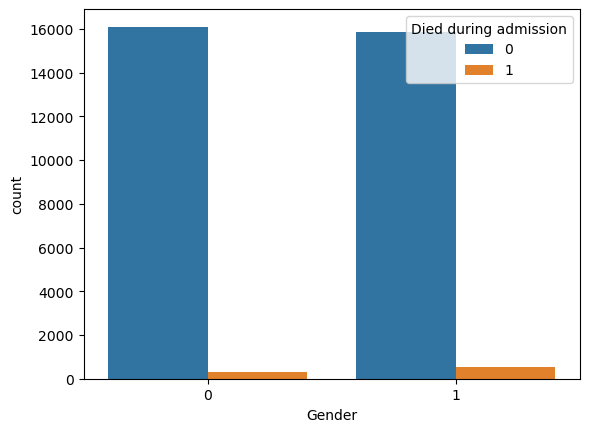

In [118]:
male = inpatient_enth2[inpatient_enth2['Gender'] == 1]
female = inpatient_enth2[inpatient_enth2['Gender'] == 0]
male_res = male.sample(n = len(female))
gender_res = pd.concat([male_res, female],axis = 0)

sns.countplot(data=gender_res, x="Gender", hue="Died during admission")

In [119]:
gender_res.corr()

/tmp/ipykernel_12858/3307282324.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gender_res.corr()


,Internalpatientid,Age at admission,Died during admission,Gender,Veteran flag
Internalpatientid,1.000000,-0.022010,0.006722,-0.011716,-0.008376
Age at admission,-0.022010,1.000000,0.111601,0.232085,0.031646
Died during admission,0.006722,0.111601,1.000000,0.045040,0.003363
Gender,-0.011716,0.232085,0.045040,1.000000,0.039096
Veteran flag,-0.008376,0.031646,0.003363,0.039096,1.000000


## Among, gender, age, veteran flag, age has the highest correlation with mortality.
Races has not been explored yet.
